# Mushroom edibility classification


**Student number: 23381200**
**Date: xx-xx-xx**

Artificial Intelligence tools used in this assignment:
- Google Gemini as a coding assistant
- Perplexity AI Model as a research tool

# A. Background


Mushrooms are a global dietary staple, valued for their low calorie and high nutrient content. A 2023 systematic review by De Cianni *et al.* highlights their umami flavour and potential as a plant-based protein alternative due to their texture and high-quality protein. However, the review notes the prevalence of mycophobia in some regions, driven somewhat by fears of poisoning.

These fungi go beyond their culinary role as they emerge as powerful nutraceuticals, offering therapeutic potential in modern healthcare. A comprehensive analysis of fungal nutraceutical constituents conducted by Ma *et al.* (2018) demonstrated that mushrooms possess a diverse array of bioactive molecules including polysaccharides, proteins, glycoproteins, unsaturated fatty acids, phenolic compounds, tocopherols, ergosterols and lectins. This biochemical profile, coupled with their favorable nutritional composition positions mushrooms as potential therapeutic agents in preventive medicine.

In Europe, for example, only 60 of the 269 edible mushroom taxa suitable for marketing are commercially cultivated, with the majority being wild varieties which if misidentified can have serious consequences. Thus mechanisms that enable the safe commercialisation of wild mushrooms are needed.

Machine learning can be leveraged as a tool for the safe commercialisation of wild mushrooms in an industry set to grow from 18.39 million USD (US Dollar) in 2024 to 32.04 million USD by 2032 (Fortune Business Insights, 2024) by enabling accurate and robust classification of edible versus poisonous (or potentially poisonous) mushrooms.

The objective of this project is to showcase 2 machine learning methods that have the potential to lead to the accurate classification of mushrooms. First an ensemble learning method showing the potential for classification based on tabular data. Second a deep learning method showcasing classification based on labelled images.

# B. Methods

## 1. Data description


The UC Irvine Machine Learning Repository provided the tabular dataset for this project (Wagner *et al.*, 2021a). This hypothetical mushroom dataset based on the 3rd edition of the book guide *Mushrooms and Toadstools* comprises 61069 theoretical capped mushrooms, representing 173 species with 353 mushrooms per species.

Kaggle provided the database of imagery for this project (Kuno-Williams, 2022), these can be accessed via https://www.kaggle.com/datasets/derekkunowilliams/mushrooms/data. It contains 8781 jpg files of mushrooms representing 261 species gathered from Google. The mushrooms are classified as 'conditionally_edible', 'deadly', 'edible' and 'poisonous'. For the purpose of this assignment only the 'edible' and 'poisonous' images are considered.






## 2. Model selection


Firstly the possibility of classifying mushroom edibility based on tabular data is explored by training a random forest model.This type of algorithm provides a more stable and accurate prediction compared to linear discriminant analysis, naive bayes and logistic regression (Wagner et al. 2021b) and is very flexible as it does not have any formal assumptions about the distribution. The RF builds a multiple decision trees which are combined to provide the prediction (Wagner *et al.*, 2021b).


Second the potential for mushroom classification based on images using a convolutional neural network (CNN) was explored as these are commonly used for solving classification problems (Rawat et al., 2017). Transfer learning was applied to 3 pretrained image classification models, InceptionV3 developed by Google, MobileNetV2 developed by Recht et al. and lastly VGG16 developed by Simonyan et al., architectures show in fig 1. Finally a very simple novel CNN was also evaluated.

**insert model architechtures***

## 3. Random Forest Classifier training

### Methods

#### Data import and wrangling

The following code chunk downloads the necessary resources for data processing, model training, evaluation and visualisation in this assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from joblib import dump, load

The training dataset can be found in the GitHub repository under Model_training as '*secondary_mushroom_data.csv*' and the following code chunk imports the data directly from the raw data link from GitHub and separates the target variables, edible (e) or poisonous (p) from the features as well as doing manual data type conversions to ensure the data is in the correct format.

In [2]:
# URL of the raw CSV file in the GitHub repository
url = "https://raw.githubusercontent.com/LientjieColahan/C7082_23381200/refs/heads/main/Model_training/secondary_mushroom_data.csv"

# Load the database
data = pd.read_csv(url, delimiter=';')
# Separate features and target
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

# Convert categorical variables to categorical data type
categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].astype('category')

# Convert target variable to categorical
y = y.astype('category')

# Convert continuous variables to float
continuous_columns = ['cap-diameter', 'stem-height', 'stem-width']
X[continuous_columns] = X[continuous_columns].astype(float)

#### Exploratory data analysis

Before training a model it is good practice to do some basic data analysis to make sure the data is suitable for model training. The code below gives an overview of the dataset and shows how many missing values there are for each feature.

In [3]:
# Display basic information about the dataset
print("\nFirst few rows of the features:")
print(X.head())
print("\nFirst few rows of the target:")
print(y.head())

# Check for missing values
print("\nMissing values in the dataset:")
missing_values = X.isnull().sum()
missing_percentages = (100 * X.isnull().sum() / len(X)).round(2)
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Count', 'Percentage'])
missing_table = missing_table[missing_table['Count'] > 0].sort_values('Percentage', ascending=False)
print(missing_table)


First few rows of the features:
   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0               e          NaN          w        16.95       17.09         s   
1               e          NaN          w        17.99       18.19         s   
2               e          NaN          w        17.80       17.74         s   
3               e          NaN          w        15.77       15.98         s   
4               e          NaN          w        16.53       17.20         s   

  stem-surface stem-color veil-type veil-color has-ri

Determining if there are any features that relate to only one of the target variables is important as these types of features may cause bias in the training data making the model less generalisable. The following code chunk visualises the relationship between the categorical features and the target variables in bar plots.

<ipython-input-4-588858ad4de9>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Target Variable', fontsize=8)


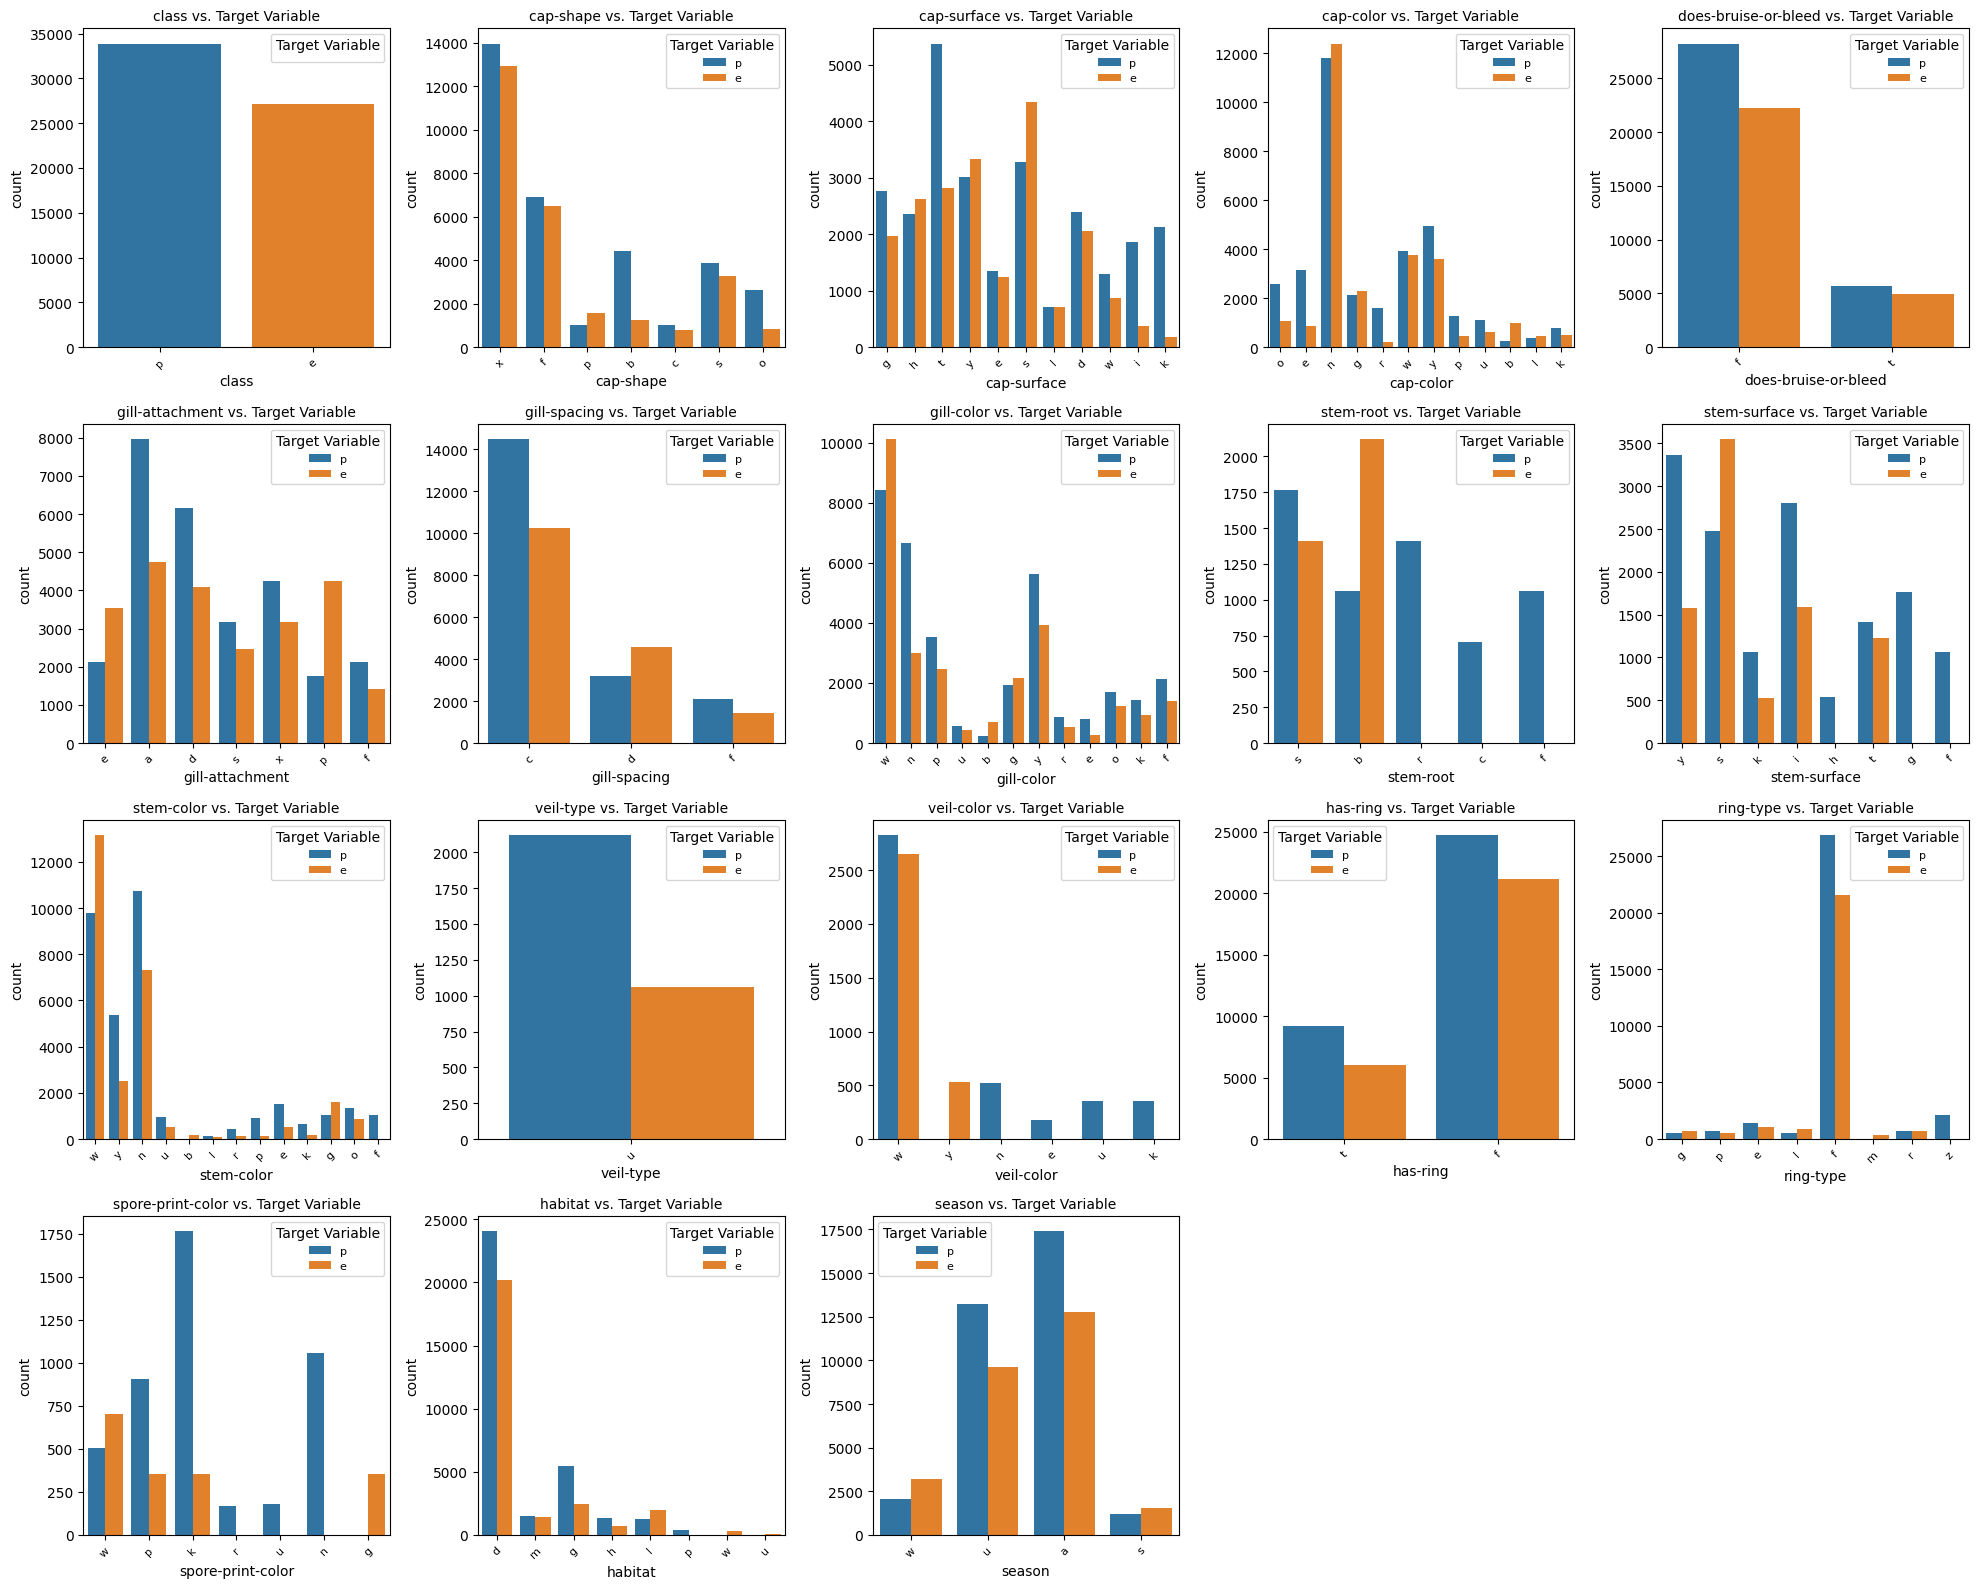

In [4]:
# Explore relationship between categorical features and target variable through bar plot visualisations
# Define the number of rows and columns for the grid
num_rows = 4
num_cols = 5

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through categorical columns and plot on subplots
categorical_columns = data.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='class', data=data, ax=axes[i])
    axes[i].set_title(f'{column} vs. Target Variable', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].legend(title='Target Variable', fontsize=8)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Hide any unused subplots
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

Considering the missing values and the relationships between the features and the target it is reasonable to remove:

*   Veil-type as it ha >90% missing values and there is only a single veil type in the dataset
*   Veil-color as it has >85% missing values and only 1 veil colour encodes information for both the values in the target.
* Spore-print-colour as it has >85% missing values and only 3 out of 7 spore print colours encode data for both the values in the target.
* Stem-root as it has >80% missing values and only 2 out of 5 stem root types encode data for both values in the target

The code chunk below removes these features.

In [5]:
# Drop categorical variables which may bias the prediction
X.drop(columns=['veil-type', 'veil-color', 'spore-print-color', 'stem-root'], inplace=True)

The distribution of the data between edible and poisonous needs to be close to 50/50 in order to prevent bias during training. The following code checks the spread of the data after feature removal.

<ipython-input-7-f7df0e9dff55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=data, palette={'e':'green','p':'blue'})  # Use 'class' column for x-axis


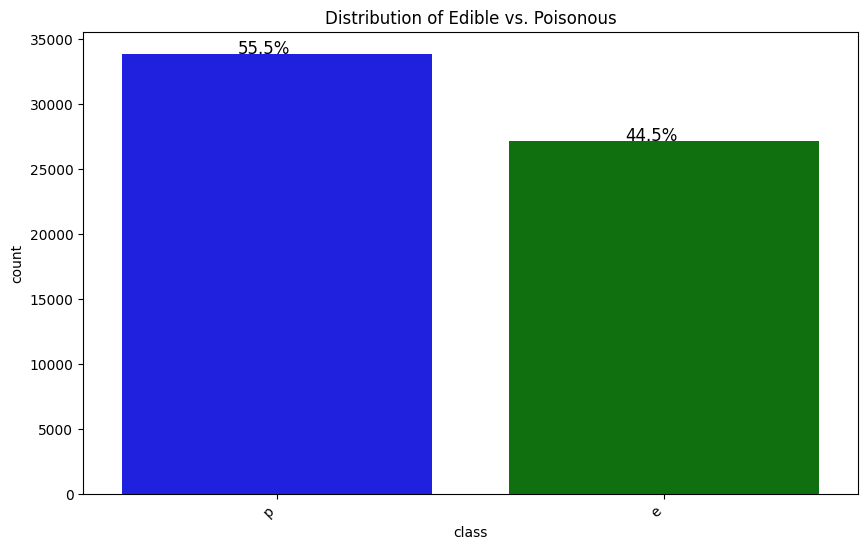

In [7]:
# Check the data spread between edible and poisonous
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', data=data, palette={'e':'green','p':'blue'})  # Use 'class' column for x-axis
plt.title('Distribution of Edible vs. Poisonous')
plt.xticks(rotation=45, ha='right')

# Calculate percentage for each bar
total = len(data['class'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x_coord = p.get_x() + p.get_width() / 2 - 0.1
    y_coord = p.get_y() + p.get_height()
    ax.annotate(percentage, (x_coord, y_coord), size=12)

plt.show()

### Model creation and training

Machine learning models have certain universal requirements for model training - the data has to be numerical and there needs to be a subset of data for training, validation (in deep learning) and testing. The following code chunk processes the data to make it suitable for the task of training a random forest classifier by using one-hot encoding to assign binary values to the categorical features and creating a 80:20 split in the data for training and testing.

In [8]:
# Encode categorical variables
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encode target variable (edible=0, poisonous=1)
X_encoded = pd.get_dummies(X)  # One-hot encode categorical features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

As a starting point a preliminary random forest model is trained using the training data as is. Then that model can be used to extract the feature importances and a grid search can be done as hyper parameter tuning to find the best model. The following code chunk trains a preliminary model, applies feature selection and then implements a grid search to find the optimal combination of model parameters. The preliminary model is then retrained with the optimised features to give the most accurate prediction model.

Fitting 16 folds for each of 36 candidates, totalling 576 fits


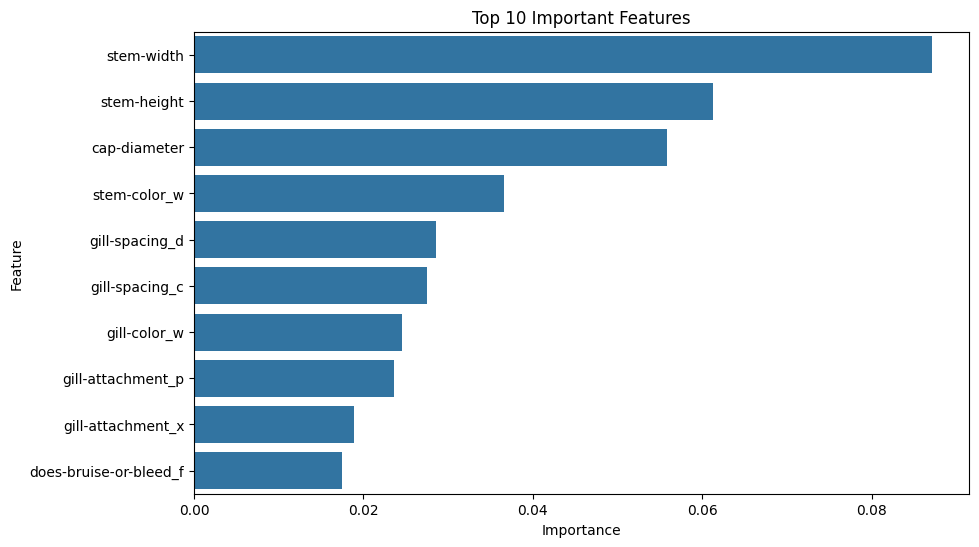

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [9]:
# Train a preliminary RF model to enable feature selection
rf_prelim = RandomForestClassifier(random_state=42)
rf_prelim.fit(X_train, y_train)

# Perform feature selection using feature importance
feature_importances = pd.DataFrame({'Feature': X_encoded.columns,
                                    'Importance': rf_prelim.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [2 ,30, 100],  # the number of trees in the forest
              'max_depth': [1, 10],  # the maximum depth of trees
              'min_samples_split': [2, 3, 5],  # the minimum samples required to split an internal node
              'min_samples_leaf': [1, 2]}   # the minimum samples required to be at a leaf node

# Create a pipeline
grid_search = GridSearchCV(estimator=rf_prelim,
                           param_grid=param_grid,
                           cv=16,   # 16-fold cross-validation
                           scoring='accuracy',  # accuracy as the scoring metric
                           verbose=1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

# Best parameters and model from GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


The following code chunk saves the best model to the cloned GitHub repository. This file is available in the GitHub repository under Assignment as *best_rf_model.joblib*

|Best Parameters     |        |
|--------------- ----|--------|
|Max Depth           | 10     |
|Max Samples per Leaf| 1      |
|Min samples per split| 2    |
|Number of estimators| 100  |


In [ ]:

# Save the best model using joblib
dump(best_rf_model, 'C:/Users/colah/OneDrive/Documents/GitHub/C7082_23381200/Assignment/best_rf_model.joblib')

### Results

Classification Report:

|              ||Precision||    Recall||  f1-score||   Support||
|--------------||---------||----------||----------||----------||
|           0  ||   0.97  ||    0.98  ||  0.97    ||   5374   ||
|           1  ||   0.98  ||    0.98  ||  0.98    ||   6840   ||
|              ||         ||          ||          ||          ||
|    accuracy  ||         ||          ||  0.98    ||   12214  ||
|   macro avg  ||   0.98  ||   0.98   ||  0.98    ||   12214  ||
|weighted avg  ||   0.98  ||   0.98   ||  0.98    ||   12214  ||

Confusion matrix:

![Confusion_matrix](filename= 'https://github.com/LientjieColahan/C7082_23381200/raw/main/Assignment/Outputs/Confusion_Matrix.png')

In [10]:
# Evaluate model performance on test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.show()
plt.savefig('C:/Users/colah/OneDrive/Documents/GitHub/C7082_23381200/Assignment/Outputs/Confusion_Matrix.png')

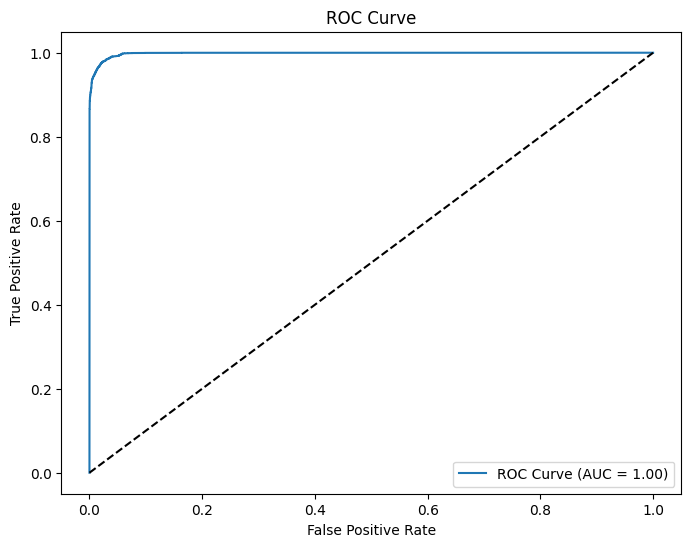

In [11]:
# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4. Convolutional Neural Network training


### Methods

In [ ]:
# Insert code here

### Results

In [ ]:
# Insert code here

# C. Results






Insert results here

# D. Discussion





"Interpretation of the meaning and importance of the work"

# E. Literature


De Cianni, R., Pippinato, L. and Mancuso, T. (2023) 'A systematic review on drivers influencing consumption of edible mushrooms and innovative mushroom-containing products', Appetite, 182, pp. 106454. doi: 10.1016/j.appet.2023.106454.

Kuno-Williams, D. (2022) Mushrooms. Available at: https://www.kaggle.com/datasets/derekkunowilliams/mushrooms/data?select=mushroom_dataset (Accessed: 2024-12-08).

Fortune Business Insights (2024) Mushroom Market Size, Share & Industry Analysis, By Type (Button, Shiitake, Oyster, and Others), By Form (Fresh, Frozen, Dried, and Canned), and Regional Forecast, 2024-2032. Available at: https://www.fortunebusinessinsights.com/industry-reports/infographics/mushroom-market-100197 (Accessed: 2024/12/05).

Ma, G., Yang, W., Zhao, L., Pei, F., Fang, D. and Hu, Q. (2018) 'A critical review on the health promoting effects of mushrooms nutraceuticals', Food Science and Human Wellness, 7(2), pp. 125–133. doi: 10.1016/j.fshw.2018.05.002.

Rawat, W. and Wang, Z. (2017) 'Deep Convolutional Neural Networks for Image Classification: A Comprehensive Review', Neural Computation, 29(9), pp. 2352–2449. doi: 10.1162/neco_a_00990.

Wagner, D., Heider, D. and Hattab, G. (2021a) 'Secondary Mushroom', UCI Machine Learning Repository, 2021. [Online]. Available: https://doi.org/10.24432/C5FP5Q. (Accessed: 2024/12/05)

Wagner, D., Heider, D. and Hattab, G. (2021b) 'Mushroom data creation, curation, and simulation to support classification tasks', Scientific Reports, 11(1), pp. 8134. doi: 10.1038/s41598-021-87602-3.


